# Optimal advisor-advisee matching
## Author
www.solvermax.com

## Source
Based on: https://www.linkedin.com/pulse/optimal-advisor-advisee-matching-alireza-soroudi by Alireza Soroudi 

## Situation
We need to assign Students to be supervised by a Professor. Each Student has ranked the Professors, with higher ranking meaning higher preference. Similarly, each Professor has ranked the Students, with higher ranking meaning higher preference. Each Student must be assigned to one Professor, and each Professor has a maximum capacity for Students that they can supervise.

The question is how to assign all Students to Professors with maximum satisfaction of their preferences?

## Formulation

### Model 1

Weights defined as addition of the preferences:

$
\begin{align}
& \text{Objective:} \\
& \text{max } OF =  \sum_{i,j} w_{i,j} \times U_{i,j} \\
\\
& \text{Constraints:} \\
& \sum_{j} U_{i,j} \leq Capacity_i \quad \forall_i \\
& \sum_{i} U_{i,j} = 1 \quad \forall_j \\
\\
& \text{Variables:} \\
& U_{i,j} \in \{\text{0, 1}\} \text{ Assignment of Student $j$ to Professor $i$}\\
\\
& \text{Data:} \\
& w_{i,j} = P_{i,j} + Q_{i,j} \text{ Add Professor and Student preferences} \\
& P_{i,j} = \text{ Preference of Professor $i$ for Student $j$}\\
& Q_{i,j} = \text{ Preference of Student $j$ for Professor $i$}\\
\end{align}
$

### Model 2
Model 1 but with weights defined as multiplication of the preferences:

$
\begin{align}
& \text{Data:} \\
& w_{i,j} = P_{i,j} \times Q_{i,j} \\
\end{align}
$

### Model 3
Model 2 plus additional constraints for minimum preferences of Professors and Students, leaving Model 2 unchanged:

$
\begin{align}
& \text{Constraints:} \\
& \sum_{j} U_{i,j} \times P_{i,j} \geq ProfMinScore \times \sum_{j} U_{i,j} \quad \forall_i \\
& \sum_{i} U_{i,j} \times Q_{i,j} \geq StudentMinScore \quad \forall_j \\
\end{align}
$

We set a value for StudentMinScore, then manually goal seek to find the best possible value for ProfMinScore.

### Model 4
Plot efficient frontier for Model 1 by adding the following, leaving Model 1 unchanged:

$
\begin{align}
& \text{Constraints:} \\
& \sum_{i,j} Q_{i,j} \times U_{i,j} = obj\_students \\
& \sum_{i,j} P_{i,j} \times U_{i,j} = obj\_prof \\
& obj\_students \geq limit \\
\\
& \text{Variables:} \\
& obj\_prof = \text{ Objective value for Professors }\\
& obj\_students = \text{ Objective value for Students }\\
\\
& \text{Data:} \\
& limit = \text{ Student preference} \\
\end{align}
$

### Model 5
Repeat Model 3 with a lower value for StudentMinScore - giving greater emphasis to the preferences of the Professors. We manually goal seek to find the best possible value for ProfMinScore.

### Model 6
Repeat Model 3 with a higher value for StudentMinScore - giving greater emphasis to the preferences of the Students. We manually goal seek to find the best possible value for ProfMinScore.

In [1]:
# Import dependencies
from pyomo.environ import *
import numpy as np 
import pandas as pd
import random 
import matplotlib.pyplot as plt
import copy
from IPython.display import display

In [2]:
# Include external Python code
with open('data.py') as f: exec(f.read())    
with open('utilities.py') as f: exec(f.read())
with open('plots.py') as f: exec(f.read())
with open('models.py') as f: exec(f.read())

In [3]:
# Globals
Nprof = 8   # Number of Professors
Nstudent = 50   # Number of Students
ProfMinCapacity = 5   # Minimum for generating capacity of each Professor
ProfMaxCapacity = 10   # Maximum for generating capacity of each Professor
opt = SolverFactory('glpk')   # Solver to use
WriteImages = False   # Write images to local folder
StudentMinScore = 0   # Lower bound on Student preference in solution
ProfMinScore = 0.0   # Lower bound on Professor average preference in solution

In [4]:
# Get data
a, b, P, Q, cap = defineData()

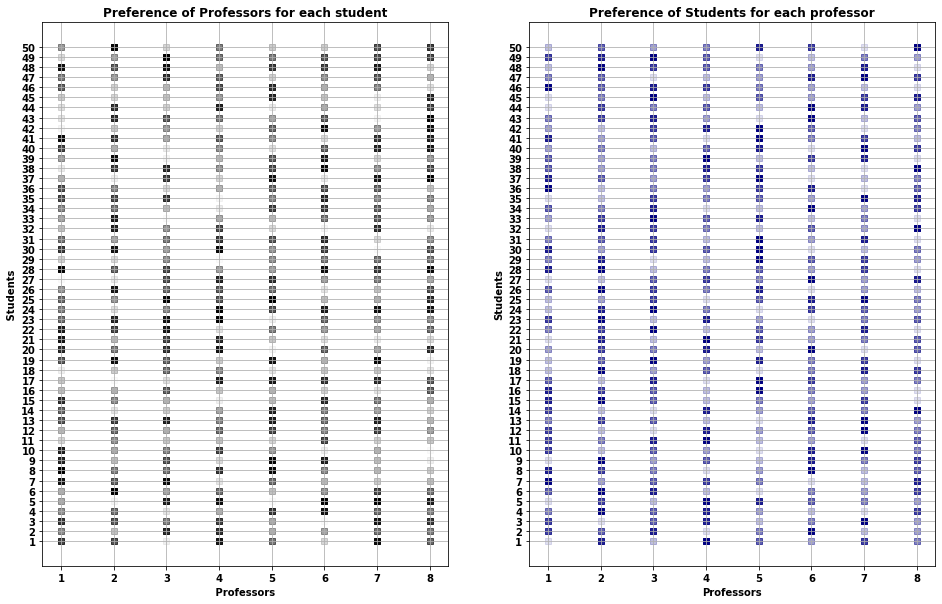

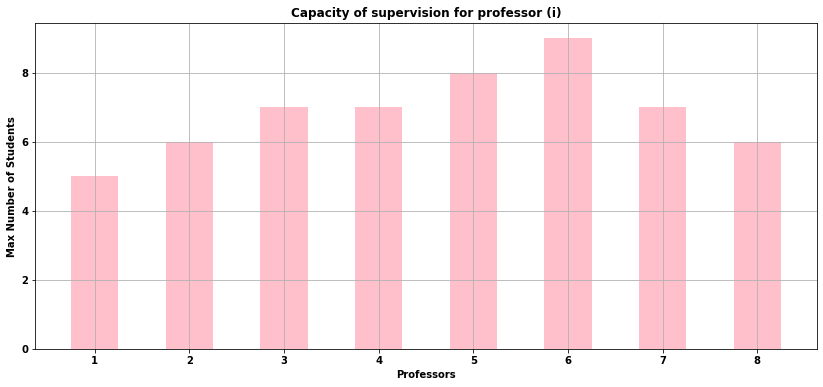

In [5]:
# Plot data
plotPreferences()
plotCapacity()

Model 1
Feasible
OF = 2,485


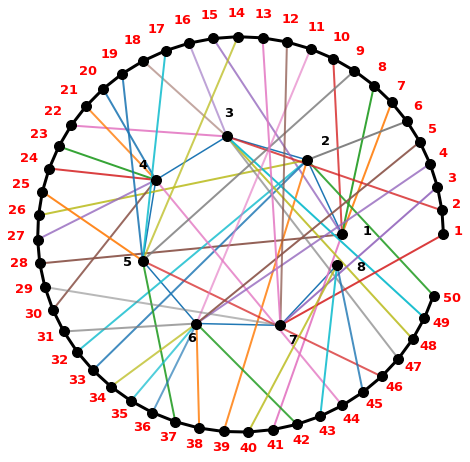

Professor Average Score


,1,2,3,4,5,6,7,8
Score,46.00,46.50,40.43,45.57,45.86,42.44,40.20,45.33


Student Score


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Score,6,7,8,2,5,8,8,7,2,6,3,8,8,3,7,5,8,3,7,7,8,8,7,4,5,8,6,7,6,5


,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Score,3,7,6,8,3,7,8,2,3,6,7,5,5,5,7,4,1,6,8,5


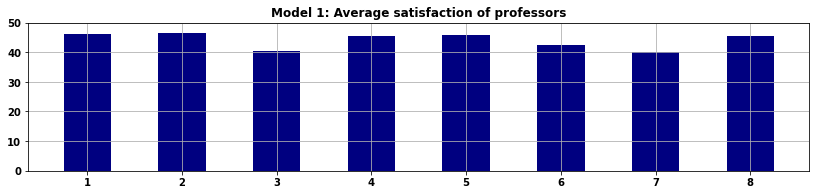

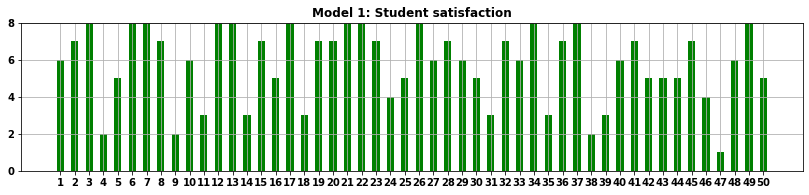

In [6]:
# Model 1: Additive Professor and Student preferences
model1 = defineModel1()
results1 = opt.solve(model1)
printResult(results1, model1, 'Model 1', '1')

Model 2
Feasible
OF = 14,326


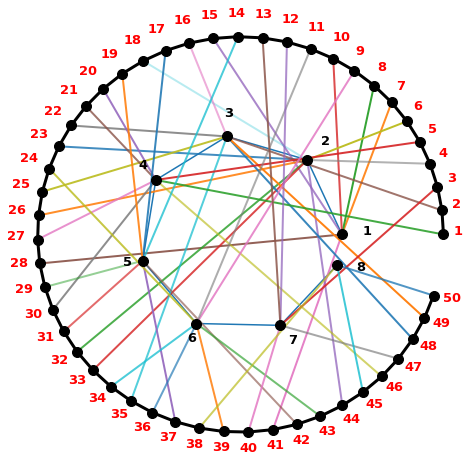

Professor Average Score


,1,2,3,4,5,6,7,8
Score,46.00,37.75,43.14,43.29,38.00,38.71,40.20,38.33


Student Score


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Score,8,7,8,8,8,8,8,7,7,6,3,8,8,3,7,5,8,8,7,7,8,8,8,6,6,8,6,7,8,5


,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Score,8,7,6,8,6,7,8,8,6,8,7,8,8,6,7,6,8,6,8,8


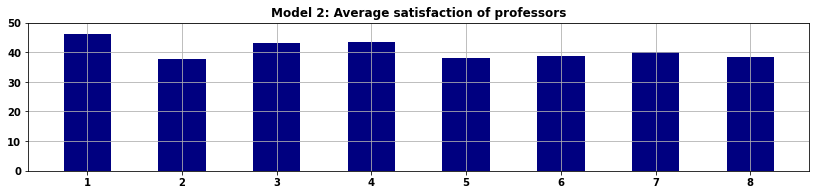

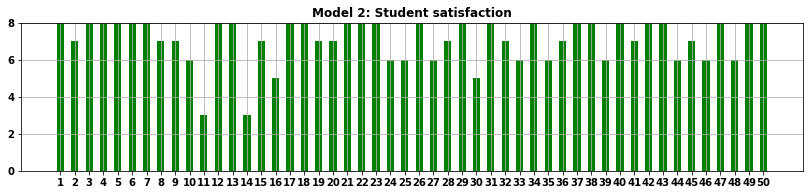

In [7]:
# Model 2: Change Model 1 to have multiplicative Professor and Student preferences
model2 = defineModel2(model1)
results2 = opt.solve(model2)
printResult(results2, model2, 'Model 2', '2')

Model 3
Feasible
OF = 13,544


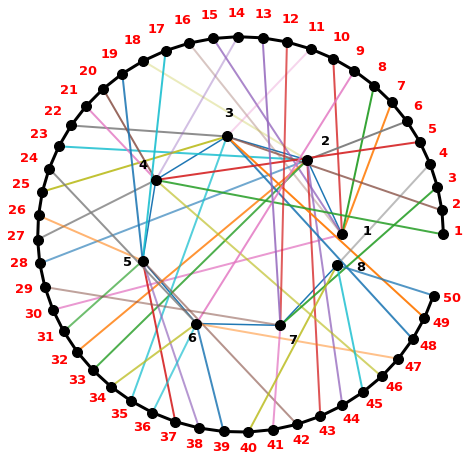

Professor Average Score


,1,2,3,4,5,6,7,8
Score,38.33,37.50,40.29,39.00,37.71,37.67,38.40,37.50


Student Score


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Score,8,7,8,6,8,8,8,7,7,6,7,8,8,7,7,7,8,8,7,7,8,8,8,6,6,7,6,8,6,7


,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Score,8,7,6,8,6,7,8,6,6,6,6,8,6,6,7,6,7,6,8,8


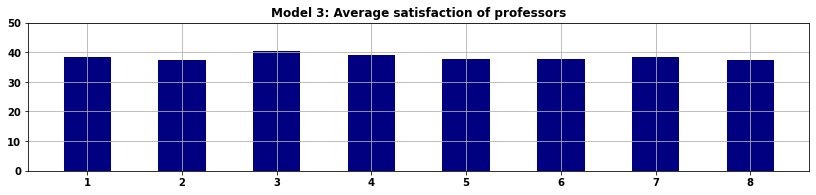

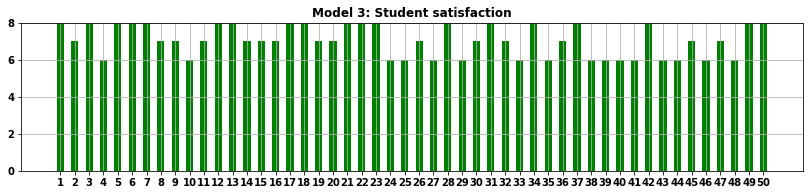

In [8]:
# Model 3: Add constraints to Model 2 for minimum Professor and Student outcomes
StudentMinScore = 6
ProfMinScore = 37.50
model3 = defineModel3(model2)
results3 = opt.solve(model3)
printResult(results3, model3, 'Model 3', '3')

Model 4
Frontier start
OF1_(student) = 254
OF2_(prof) = 2,211

Frontier end
OF1_(student) = 395
OF2_(prof) = 1,493


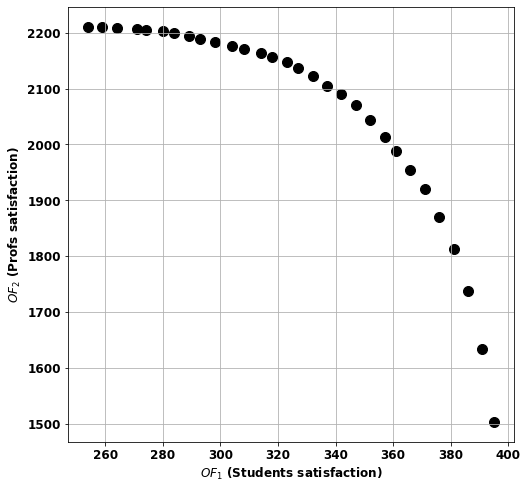

In [9]:
# Model 4: Generate efficient frontier for Model 2
print('Model 4')
model4 = defineModel4(model1)
OF1, OF2 = frontier(model4)
plotFrontier(OF1, OF2)

Model 5
Feasible
OF = 13,734


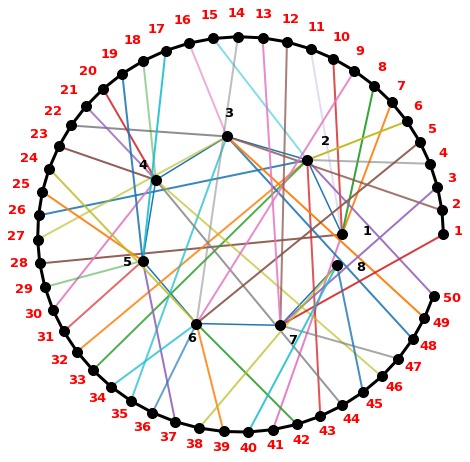

Professor Average Score


,1,2,3,4,5,6,7,8
Score,40.67,40.38,41.00,40.71,40.50,40.88,41.40,40.67


Student Score


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Score,6,7,8,8,5,8,8,7,7,6,6,8,8,5,8,5,8,5,7,7,8,8,7,6,5,8,5,7,8,5


,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Score,8,7,6,8,6,7,8,8,6,6,7,5,6,5,7,6,8,6,8,5


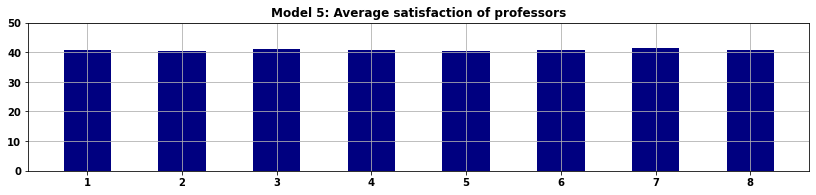

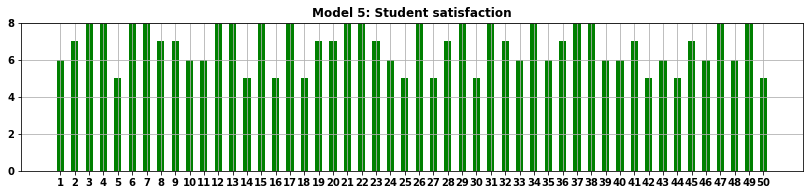

In [10]:
# Model 5: Change minimum Professor and Student outcomes
StudentMinScore = 5
ProfMinScore = 40.37
model5 = defineModel5(model3)
results5 = opt.solve(model5)
printResult(results5, model5, 'Model 5', '5')

Model 6
Feasible
OF = 12,629


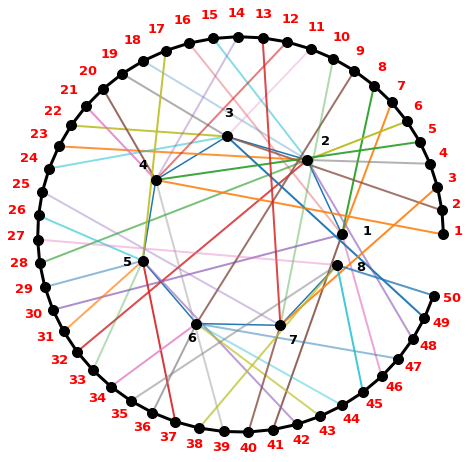

Professor Average Score


,1,2,3,4,5,6,7,8
Score,37.67,32.25,33.50,34.29,31.29,31.00,32.40,31.40


Student Score


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Score,8,7,8,8,8,8,8,7,7,8,7,7,8,7,8,7,8,8,8,7,8,8,8,8,8,7,7,8,8,7


,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Score,8,7,7,8,7,7,8,8,8,8,7,8,8,8,7,8,7,8,8,8


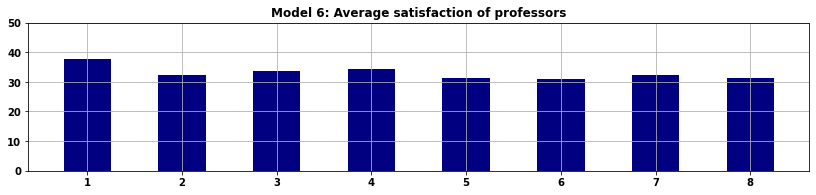

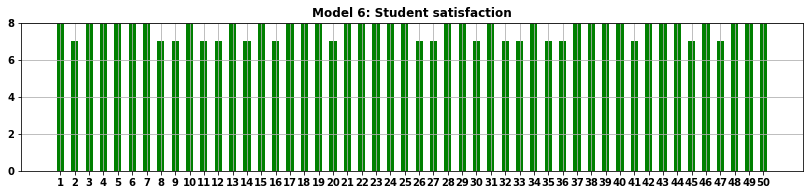

In [11]:
# Model 6: Change minimum Professor and Student outcomes again
StudentMinScore = 7
ProfMinScore = 31.00
model6 = defineModel5(model5)
results6 = opt.solve(model6)
printResult(results6, model6, 'Model 6', '6')